### 1. Supervised, Semi-Supervised, and Unsupervised Learning

In [1]:
import warnings
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter
from scipy.stats import mode

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import (
    accuracy_score,
    auc,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_curve,
    roc_auc_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    StratifiedKFold,
    train_test_split,
)
from sklearn import preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import LinearSVC
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [2]:
df = pd.read_csv('./../data/wdbc.data', header=None)
col = ['ID', 'Class']
col.extend(['attr_'+ str(i) for i in range(1,31)])
df.columns = col
display(df)

,ID,Class,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,...,attr_21,attr_22,attr_23,attr_24,attr_25,attr_26,attr_27,attr_28,attr_29,attr_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, un- supervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

In [3]:
df['Class'] = df['Class'].map({'B': 0, 'M': 1})

In [4]:
X = df.iloc[:, 2:]  
y = df['Class']     

train_X, test_X, train_y, test_y = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y
)

train_set = pd.concat([train_X, train_y], axis=1)  
test_set = pd.concat([test_X, test_y], axis=1)

display(train_set)

,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10,...,attr_22,attr_23,attr_24,attr_25,attr_26,attr_27,attr_28,attr_29,attr_30,Class
240,13.64,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.037310,0.1717,0.05660,...,19.05,94.11,683.4,0.1278,0.12910,0.15330,0.09222,0.2530,0.06510,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.152000,0.2397,0.07016,...,39.42,184.60,1821.0,0.1650,0.86810,0.93870,0.26500,0.4087,0.12400,1
369,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.150100,0.1824,0.06140,...,25.80,195.00,2227.0,0.1294,0.38850,0.47560,0.24320,0.2741,0.08574,1
461,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.168900,0.2061,0.05623,...,31.37,251.20,4254.0,0.1357,0.42560,0.68330,0.26250,0.2641,0.07427,1
193,12.34,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.045620,0.1943,0.06937,...,39.34,101.70,768.9,0.1785,0.47060,0.44250,0.14590,0.3215,0.12050,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,12.87,19.54,82.67,509.2,0.09136,0.07883,0.01797,0.020900,0.1861,0.06347,...,24.38,95.14,626.9,0.1214,0.16520,0.07127,0.06384,0.3313,0.07735,0
106,11.64,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.034850,0.1801,0.06520,...,29.26,85.51,521.7,0.1688,0.26600,0.28730,0.12180,0.2806,0.09097,0
159,10.90,12.96,68.69,366.8,0.07515,0.03718,0.00309,0.006588,0.1442,0.05743,...,18.20,78.07,470.0,0.1171,0.08294,0.01854,0.03953,0.2738,0.07685,0
236,23.21,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.123700,0.1909,0.06309,...,34.51,206.00,2944.0,0.1481,0.41260,0.58200,0.25930,0.3103,0.08677,1


### i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [5]:
def calculateMetrics(clf, dataset_name, features, true_labels, pred_labels):
    acc = accuracy_score(true_labels, pred_labels)
    pre = precision_score(true_labels, pred_labels, zero_division=0)
    rec = recall_score(true_labels, pred_labels)
    f1 = f1_score(true_labels, pred_labels)
    
    decision_scores = clf.decision_function(features)
    fpr, tpr, _ = roc_curve(true_labels, decision_scores)
    auc_score = auc(fpr, tpr)
    
    return (acc, pre, rec, f1, auc_score)


In [6]:
def visualize_model_performance(classifier, dataset_type, features, true_labels, pred_labels):
    print(f'\n=== Performance Analysis: {dataset_type} Data ===')
    
    cm = confusion_matrix(true_labels, pred_labels)
    print(f'\nConfusion Matrix ({dataset_type}):\n{cm}')
    
    try:
        scores = classifier.decision_function(features)
    except AttributeError:
        scores = classifier.predict_proba(features)[:, 1]
        
    fpr, tpr, _ = roc_curve(true_labels, scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='#FF6347', lw=2, 
             label="ROC curve (area = %0.3f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color='#1E90FF', lw=2, linestyle='--')
    
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve - {dataset_type} Set', fontsize=14)
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

In [7]:
train_accuracy = []
train_precision = []
train_recall = []
train_f1 = []
train_auc = []
test_accuracy = []
test_precision = []
test_recall = []
test_f1 = []
test_auc = []
for M in range(1, 31):
    print(f"Monte Carlo iteration {M}/30")
    
    scaler = preprocessing.StandardScaler()
    scaler = scaler.fit(train_X)
    train_X_scale = scaler.transform(train_X)
    test_X_scale = scaler.transform(test_X)
    
    parameters = {'C':np.logspace(-3, 6, 10)}
    clf = LinearSVC(penalty='l1', dual=False, max_iter=120000)
    clf = GridSearchCV(clf, param_grid=parameters, cv=KFold(5)).fit(train_X_scale, train_y)
    
    print(" - Best Parameter 'C': {}\n".format(clf.best_params_['C']))
    l1SVMmodel = clf.best_estimator_
    l1SVMmodel = l1SVMmodel.fit(train_X_scale, train_y)
    
    train_y_pred = l1SVMmodel.predict(train_X_scale)
    acc, pre, re, f1, auc_score = calculateMetrics(l1SVMmodel, 'Train', train_X_scale, train_y, train_y_pred)
    train_accuracy.append(acc)
    train_precision.append(pre)
    train_recall.append(re)
    train_f1.append(f1)
    train_auc.append(auc_score)

    test_y_pred = l1SVMmodel.predict(test_X_scale)
    acc, pre, re, f1, auc_score = calculateMetrics(l1SVMmodel, 'Test', test_X_scale, test_y, test_y_pred)
    test_accuracy.append(acc)
    test_precision.append(pre)
    test_recall.append(re)
    test_f1.append(f1)
    test_auc.append(auc_score)
    
    

Monte Carlo iteration 1/30
 - Best Parameter 'C': 1.0

Monte Carlo iteration 2/30
 - Best Parameter 'C': 1.0

Monte Carlo iteration 3/30
 - Best Parameter 'C': 1.0

Monte Carlo iteration 4/30
 - Best Parameter 'C': 1.0

Monte Carlo iteration 5/30
 - Best Parameter 'C': 1.0

Monte Carlo iteration 6/30
 - Best Parameter 'C': 1.0

Monte Carlo iteration 7/30
 - Best Parameter 'C': 1.0

Monte Carlo iteration 8/30
 - Best Parameter 'C': 1.0

Monte Carlo iteration 9/30
 - Best Parameter 'C': 1.0

Monte Carlo iteration 10/30
 - Best Parameter 'C': 1.0

Monte Carlo iteration 11/30
 - Best Parameter 'C': 1.0

Monte Carlo iteration 12/30
 - Best Parameter 'C': 1.0

Monte Carlo iteration 13/30
 - Best Parameter 'C': 1.0

Monte Carlo iteration 14/30
 - Best Parameter 'C': 1.0

Monte Carlo iteration 15/30
 - Best Parameter 'C': 1.0

Monte Carlo iteration 16/30
 - Best Parameter 'C': 1.0

Monte Carlo iteration 17/30
 - Best Parameter 'C': 1.0

Monte Carlo iteration 18/30
 - Best Parameter 'C': 1.0

M


=== Performance Analysis: Train Data ===

Confusion Matrix (Train):
[[284   1]
 [  4 166]]


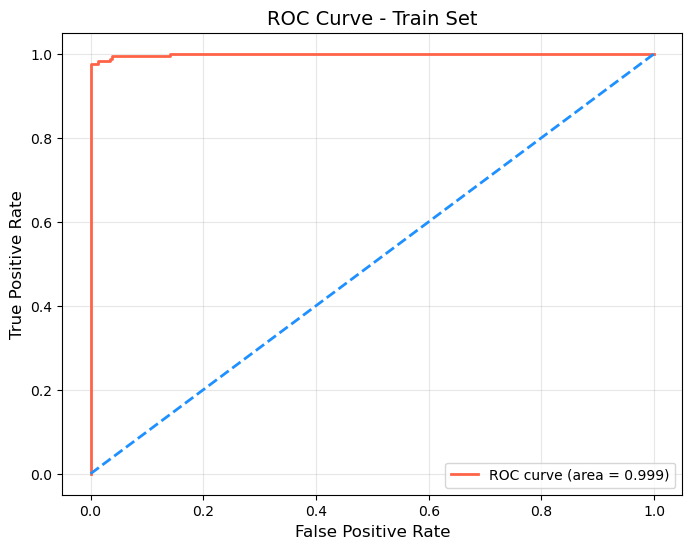




=== Performance Analysis: Test Data ===

Confusion Matrix (Test):
[[71  1]
 [ 2 40]]


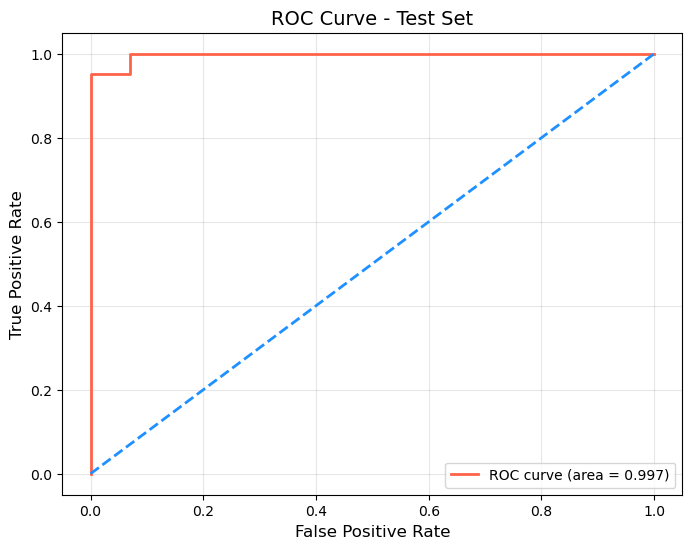

In [8]:
visualize_model_performance(clf, 'Train', train_X_scale, train_y, train_y_pred)
print("\n")
visualize_model_performance(clf, 'Test', test_X_scale, test_y, test_y_pred)

In [9]:
supervised_metrics = pd.DataFrame([np.mean(train_accuracy), np.mean(test_accuracy)], columns=['Avg Accuracy'], index=['Training with Supervised learning', 'Testing with Supervised learning'])
supervised_metrics['Avg Precision'] = [np.mean(train_precision), np.mean(test_precision)]
supervised_metrics['Avg Recall'] = [np.mean(train_recall), np.mean(test_recall)]
supervised_metrics['Avg F1-score'] = [np.mean(train_f1), np.mean(test_f1)]
supervised_metrics['Avg AUC score'] = [np.mean(train_auc), np.mean(test_auc)]
supervised_metrics

,Avg Accuracy,Avg Precision,Avg Recall,Avg F1-score,Avg AUC score
Training with Supervised learning,0.989011,0.994012,0.976471,0.985163,0.998658
Testing with Supervised learning,0.973684,0.975610,0.952381,0.963855,0.996693


### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

In [10]:
X = df.iloc[:, 2:] 
y = df['Class']    

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y
)

pos_indices = np.where(y_train == 1)[0]
neg_indices = np.where(y_train == 0)[0]

np.random.seed(42)  
labeled_pos = np.random.choice(pos_indices, len(pos_indices)//2, replace=False)
labeled_neg = np.random.choice(neg_indices, len(neg_indices)//2, replace=False)
labeled_indices = np.concatenate([labeled_pos, labeled_neg])
unlabeled_indices = np.setdiff1d(np.arange(len(y_train)), labeled_indices)

X_labeled = X_train.iloc[labeled_indices]
y_labeled = y_train.iloc[labeled_indices]
X_unlabeled = X_train.iloc[unlabeled_indices]


### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.
### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

Monte Carlo iteration 1/30
Best C parameter: 0.1
Monte Carlo iteration 2/30
Best C parameter: 0.1
Monte Carlo iteration 3/30
Best C parameter: 0.1
Monte Carlo iteration 4/30
Best C parameter: 0.1
Monte Carlo iteration 5/30
Best C parameter: 0.1
Monte Carlo iteration 6/30
Best C parameter: 0.1
Monte Carlo iteration 7/30
Best C parameter: 0.1
Monte Carlo iteration 8/30
Best C parameter: 0.1
Monte Carlo iteration 9/30
Best C parameter: 0.1
Monte Carlo iteration 10/30
Best C parameter: 0.1
Monte Carlo iteration 11/30
Best C parameter: 0.1
Monte Carlo iteration 12/30
Best C parameter: 0.1
Monte Carlo iteration 13/30
Best C parameter: 0.1
Monte Carlo iteration 14/30
Best C parameter: 0.1
Monte Carlo iteration 15/30
Best C parameter: 0.1
Monte Carlo iteration 16/30
Best C parameter: 0.1
Monte Carlo iteration 17/30
Best C parameter: 1000000.0
Monte Carlo iteration 18/30
Best C parameter: 0.1
Monte Carlo iteration 19/30
Best C parameter: 0.1
Monte Carlo iteration 20/30
Best C parameter: 0.1
Mon

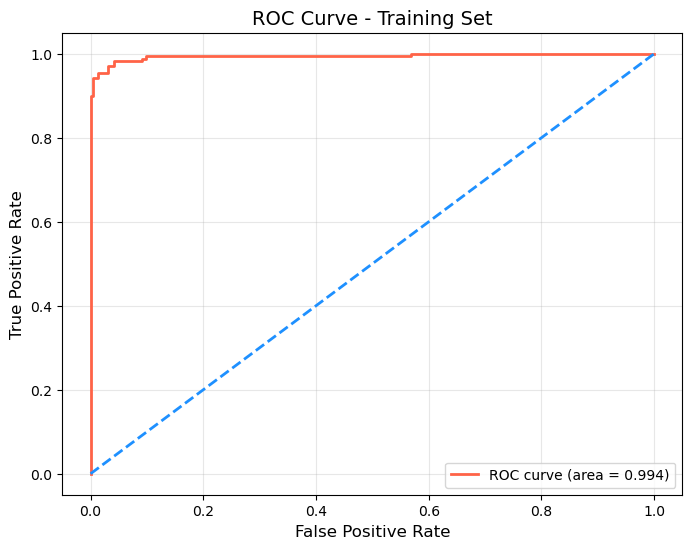


=== Performance Analysis: Testing Data ===

Confusion Matrix (Testing):
[[72  0]
 [ 2 40]]


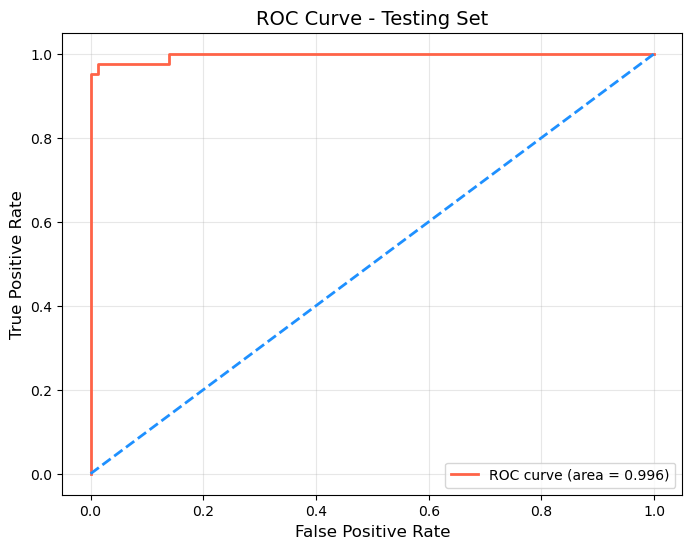

In [11]:
train_accuracy = []
train_precision = []
train_recall = []
train_f1 = []
train_auc = []
test_accuracy = []
test_precision = []
test_recall = []
test_f1 = []
test_auc = []

for repeat in range(1, 31):
    print(f"Monte Carlo iteration {repeat}/30")
    
    scaler = StandardScaler()
    scaler.fit(X_labeled)
    X_labeled_scaled = scaler.transform(X_labeled)
    X_unlabeled_scaled = scaler.transform(X_unlabeled)
    
    parameters = {'C': np.logspace(-3, 6, 10)}
    svm = LinearSVC(penalty='l1', dual=False, max_iter=120000)
    clf = GridSearchCV(svm, param_grid=parameters, cv=StratifiedKFold(5))
    clf.fit(X_labeled_scaled, y_labeled)
    
    best_svm = clf.best_estimator_
    print(f"Best C parameter: {clf.best_params_['C']}")
    
    X_train_labeled = X_labeled_scaled.copy()  
    y_train_labeled = y_labeled.copy()         
    X_train_unlabeled = X_unlabeled_scaled.copy()  
    
    while len(X_train_unlabeled) > 0:
        distances = np.abs(best_svm.decision_function(X_train_unlabeled))
        farthest_idx = np.argmax(distances)
        
        farthest_point = X_train_unlabeled[farthest_idx].reshape(1, -1)
        predicted_label = best_svm.predict(farthest_point)[0]
        
        X_train_labeled = np.vstack([X_train_labeled, farthest_point])
        y_train_labeled = np.append(y_train_labeled, predicted_label)
        
        X_train_unlabeled = np.delete(X_train_unlabeled, farthest_idx, axis=0)
        
        best_svm.fit(X_train_labeled, y_train_labeled)
    
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    y_train_pred = best_svm.predict(X_train_scaled)
    acc, pre, rec, f1, auc_score = calculateMetrics(best_svm, 'Train', X_train_scaled, y_train, y_train_pred)
    train_accuracy.append(acc)
    train_precision.append(pre)
    train_recall.append(rec)
    train_f1.append(f1)
    train_auc.append(auc_score)
    
    y_test_pred = best_svm.predict(X_test_scaled)
    acc, pre, rec, f1, auc_score = calculateMetrics(best_svm, 'Test', X_test_scaled, y_test, y_test_pred)
    test_accuracy.append(acc)
    test_precision.append(pre)
    test_recall.append(rec)
    test_f1.append(f1)
    test_auc.append(auc_score)
    
    if repeat == 30:
        visualize_model_performance(best_svm, 'Training', X_train_scaled, y_train, y_train_pred)
        visualize_model_performance(best_svm, 'Testing', X_test_scaled, y_test, y_test_pred)


In [12]:
semi_supervised_metrics = pd.DataFrame([np.mean(train_accuracy), np.mean(test_accuracy)], columns=['Avg Accuracy'], index=['Training with Semi-Supervised learning', 'Testing with Semi-Supervised learning'])
semi_supervised_metrics['Avg Precision'] = [np.mean(train_precision), np.mean(test_precision)]
semi_supervised_metrics['Avg Recall'] = [np.mean(train_recall), np.mean(test_recall)]
semi_supervised_metrics['Avg F1-score'] = [np.mean(train_f1), np.mean(test_f1)]
semi_supervised_metrics['Avg AUC score'] = [np.mean(train_auc), np.mean(test_auc)]
display(semi_supervised_metrics)

,Avg Accuracy,Avg Precision,Avg Recall,Avg F1-score,Avg AUC score
Training with Semi-Supervised learning,0.967766,0.993448,0.919804,0.955166,0.994267
Testing with Semi-Supervised learning,0.982456,1.000000,0.952381,0.975610,0.996263


### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

### A. Run the k-means algorithm multiple times. Make sure that you initializethe algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?
### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.
### C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data

Run 1/30: K-means clustering...
Run 2/30: K-means clustering...
Run 3/30: K-means clustering...
Run 4/30: K-means clustering...
Run 5/30: K-means clustering...
Run 6/30: K-means clustering...
Run 7/30: K-means clustering...
Run 8/30: K-means clustering...
Run 9/30: K-means clustering...
Run 10/30: K-means clustering...
Run 11/30: K-means clustering...
Run 12/30: K-means clustering...
Run 13/30: K-means clustering...
Run 14/30: K-means clustering...
Run 15/30: K-means clustering...
Run 16/30: K-means clustering...
Run 17/30: K-means clustering...
Run 18/30: K-means clustering...
Run 19/30: K-means clustering...
Run 20/30: K-means clustering...
Run 21/30: K-means clustering...
Run 22/30: K-means clustering...
Run 23/30: K-means clustering...
Run 24/30: K-means clustering...
Run 25/30: K-means clustering...
Run 26/30: K-means clustering...
Run 27/30: K-means clustering...
Run 28/30: K-means clustering...
Run 29/30: K-means clustering...
Run 30/30: K-means clustering...


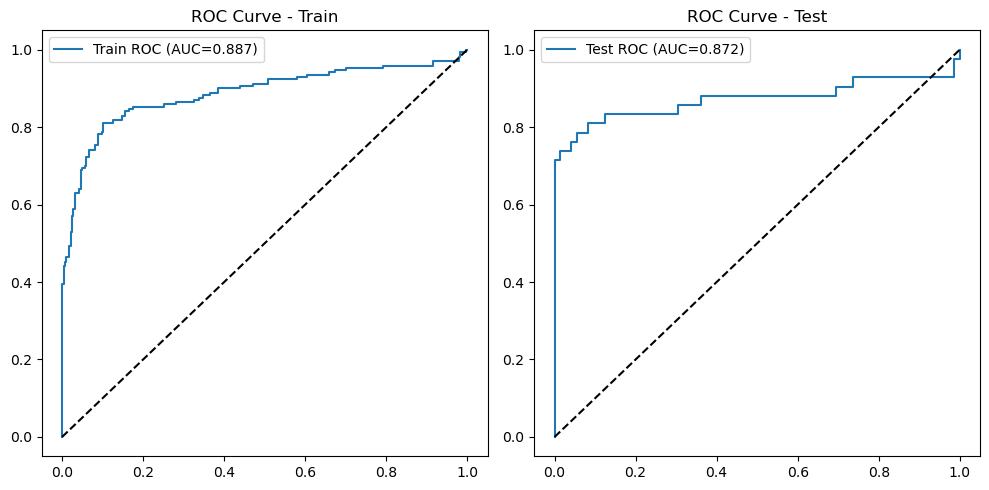


Final Confusion Matrix (Training):
[[279   6]
 [ 30 140]]

Final Confusion Matrix (Testing):
[[66  6]
 [ 6 36]]

Average Metrics Summary:


,Avg Accuracy,Avg Precision,Avg Recall,Avg F1-score,Avg AUC score
Training with Unsupervised learning,0.910769,0.924582,0.829216,0.874107,0.882000
Testing with Unsupervised learning,0.906433,0.910559,0.828571,0.866414,0.872421


In [13]:
train_accuracies = []
test_accuracies = []
train_precisions = []
test_precisions = []
train_recalls = []
test_recalls = []
train_f1_scores = []
test_f1_scores = []
train_auc_scores = []
test_auc_scores = []

final_train_cm = None
final_test_cm = None

for run in range(1, 31):
    print(f"Run {run}/30: K-means clustering...")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        stratify=y,
        random_state=run
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    kmeans = KMeans(
        n_clusters=2,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=run
    )
    train_clusters = kmeans.fit_predict(X_train_scaled)
    centers = kmeans.cluster_centers_
    
    cluster_to_label = {}
    for cluster_id in range(2):
        distances = np.linalg.norm(X_train_scaled - centers[cluster_id], axis=1)
        closest_indices = np.argsort(distances)[:30]
        closest_labels = np.array(y_train.iloc[closest_indices])
        majority_label = mode(closest_labels, keepdims=True).mode[0]
        cluster_to_label[cluster_id] = majority_label
    
    y_train_pred = np.array([cluster_to_label[label] for label in train_clusters])
    
    test_clusters = kmeans.predict(X_test_scaled)
    y_test_pred = np.array([cluster_to_label[label] for label in test_clusters])
    
    pos_center_idx = [k for k, v in cluster_to_label.items() if v == 1][0]
    train_scores = 1 / (1 + np.linalg.norm(X_train_scaled - centers[pos_center_idx], axis=1))
    test_scores = 1 / (1 + np.linalg.norm(X_test_scaled - centers[pos_center_idx], axis=1))
    
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    train_precisions.append(precision_score(y_train, y_train_pred, zero_division=0))
    train_recalls.append(recall_score(y_train, y_train_pred))
    train_f1_scores.append(f1_score(y_train, y_train_pred))
    train_auc_scores.append(roc_auc_score(y_train, train_scores))
    
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    test_precisions.append(precision_score(y_test, y_test_pred, zero_division=0))
    test_recalls.append(recall_score(y_test, y_test_pred))
    test_f1_scores.append(f1_score(y_test, y_test_pred))
    test_auc_scores.append(roc_auc_score(y_test, test_scores))
    
    if run == 30:
        final_train_cm = confusion_matrix(y_train, y_train_pred)
        final_test_cm = confusion_matrix(y_test, y_test_pred)
        fpr_train, tpr_train, _ = roc_curve(y_train, train_scores)
        roc_auc_train = auc(fpr_train, tpr_train)
        fpr_test, tpr_test, _ = roc_curve(y_test, test_scores)
        roc_auc_test = auc(fpr_test, tpr_test)
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC={roc_auc_train:.3f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title('ROC Curve - Train')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC={roc_auc_test:.3f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title('ROC Curve - Test')
        plt.legend()
        plt.tight_layout()
        plt.show()

print("\nFinal Confusion Matrix (Training):")
print(final_train_cm)
print("\nFinal Confusion Matrix (Testing):")
print(final_test_cm)

unsupervised_metrics_df = pd.DataFrame({
    'Avg Accuracy': [np.mean(train_accuracies), np.mean(test_accuracies)],
    'Avg Precision': [np.mean(train_precisions), np.mean(test_precisions)],
    'Avg Recall': [np.mean(train_recalls), np.mean(test_recalls)],
    'Avg F1-score': [np.mean(train_f1_scores), np.mean(test_f1_scores)],
    'Avg AUC score': [np.mean(train_auc_scores), np.mean(test_auc_scores)]
}, index=['Training with Unsupervised learning', 'Testing with Unsupervised learning'])

print("\nAverage Metrics Summary:")
display(unsupervised_metrics_df)


### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

Run 1/30: Spectral clustering...
Run 2/30: Spectral clustering...
Run 3/30: Spectral clustering...
Run 4/30: Spectral clustering...
Run 5/30: Spectral clustering...
Run 6/30: Spectral clustering...
Run 7/30: Spectral clustering...
Run 8/30: Spectral clustering...
Run 9/30: Spectral clustering...
Run 10/30: Spectral clustering...
Run 11/30: Spectral clustering...
Run 12/30: Spectral clustering...
Run 13/30: Spectral clustering...
Run 14/30: Spectral clustering...
Run 15/30: Spectral clustering...
Run 16/30: Spectral clustering...
Run 17/30: Spectral clustering...
Run 18/30: Spectral clustering...
Run 19/30: Spectral clustering...
Run 20/30: Spectral clustering...
Run 21/30: Spectral clustering...
Run 22/30: Spectral clustering...
Run 23/30: Spectral clustering...
Run 24/30: Spectral clustering...
Run 25/30: Spectral clustering...
Run 26/30: Spectral clustering...
Run 27/30: Spectral clustering...
Run 28/30: Spectral clustering...
Run 29/30: Spectral clustering...
Run 30/30: Spectral clu

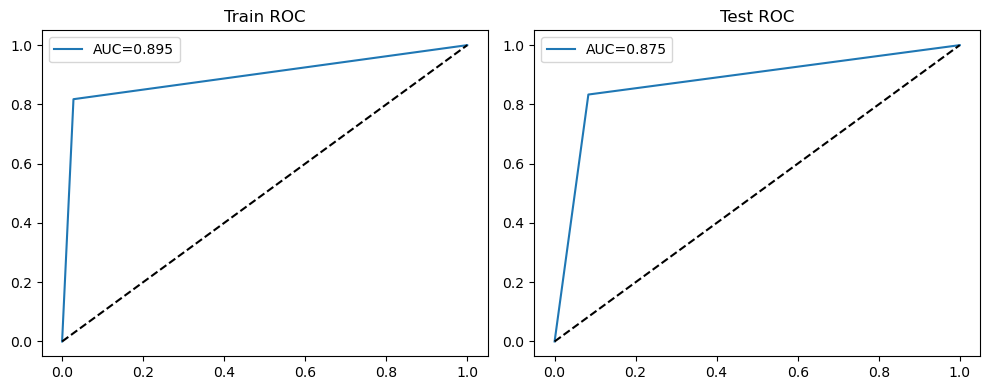

Best‐γ per run search space: [1.00000000e-03 3.59381366e-03 1.29154967e-02 4.64158883e-02
 1.66810054e-01 5.99484250e-01 2.15443469e+00 7.74263683e+00
 2.78255940e+01 1.00000000e+02]

Final Confusion Matrix (Train):
 [[277   8]
 [ 31 139]]

Final Confusion Matrix (Test):
 [[66  6]
 [ 7 35]]

Average Metrics:



,Avg Accuracy,Avg Precision,Avg Recall,Avg F1-score,Avg AUC score
Training with Spectral clustering),0.909011,0.926885,0.821569,0.870826,0.891369
Test Spectral clustering,0.579240,0.595681,0.572222,0.573908,0.577778


In [14]:
gamma_grid = np.logspace(-3, 2, 10)   

train_acc, train_prec, train_rec, train_f1, train_auc = [], [], [], [], []
test_acc,  test_prec,  test_rec,  test_f1,  test_auc   = [], [], [], [], []
final_train_cm = final_test_cm = None

for run in range(1, 31):
    print(f"Run {run}/30: Spectral clustering...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=run
    )
    scaler = StandardScaler().fit(X_train)
    X_tr = scaler.transform(X_train)
    X_te = scaler.transform(X_test)

    counts_true = np.bincount(y_train)  

    best_gamma, best_diff = None, np.inf
    for γ in gamma_grid:
        sc = SpectralClustering(
            n_clusters=2,
            affinity='rbf',
            gamma=γ,
            assign_labels='kmeans',
            n_init=10,
            random_state=run
        )
        lbl = sc.fit_predict(X_tr)
        cnt = np.bincount(lbl, minlength=2) 
        diff = np.abs(np.sort(cnt) - np.sort(counts_true)).sum()
        if diff < best_diff:
            best_diff, best_gamma = diff, γ

    sc_tr = SpectralClustering(
        n_clusters=2,
        affinity='rbf',
        gamma=best_gamma,
        assign_labels='kmeans',
        n_init=10,
        random_state=run
    )
    labels_tr = sc_tr.fit_predict(X_tr)

    sc_te = SpectralClustering(
        n_clusters=2,
        affinity='rbf',
        gamma=best_gamma,
        assign_labels='kmeans',
        n_init=10,
        random_state=run
    )
    labels_te = sc_te.fit_predict(X_te)

    cluster_to_label = {}
    for c in [0,1]:
        members = np.where(labels_tr == c)[0]
        maj = y_train.iloc[members].mode().iloc[0]
        cluster_to_label[c] = maj

    y_tr_pred = np.vectorize(cluster_to_label.get)(labels_tr)
    y_te_pred = np.vectorize(cluster_to_label.get)(labels_te)

    pos_label = y_train.max()
    pos_clusters = [c for c,v in cluster_to_label.items() if v==pos_label]
    if pos_clusters:
        pc = pos_clusters[0]
        scores_tr = (labels_tr == pc).astype(float)
        scores_te = (labels_te == pc).astype(float)
    else:
        scores_tr = np.zeros_like(labels_tr, dtype=float)
        scores_te = np.zeros_like(labels_te, dtype=float)

    train_acc .append(accuracy_score( y_train, y_tr_pred))
    train_prec.append(precision_score(y_train, y_tr_pred, zero_division=0))
    train_rec .append(recall_score(   y_train, y_tr_pred))
    train_f1  .append(f1_score(       y_train, y_tr_pred))
    train_auc .append(roc_auc_score(  y_train, scores_tr))

    test_acc .append(accuracy_score(  y_test,  y_te_pred))
    test_prec.append(precision_score( y_test,  y_te_pred, zero_division=0))
    test_rec .append(recall_score(    y_test,  y_te_pred))
    test_f1  .append(f1_score(        y_test,  y_te_pred))
    test_auc .append(roc_auc_score(   y_test,  scores_te))

    if run == 30:
        final_train_cm = confusion_matrix(y_train, y_tr_pred)
        final_test_cm  = confusion_matrix(y_test,  y_te_pred)

        fpr_tr, tpr_tr, _ = roc_curve(y_train, scores_tr)
        fpr_te, tpr_te, _ = roc_curve(y_test,  scores_te)
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        plt.plot(fpr_tr, tpr_tr, label=f"AUC={auc(fpr_tr,tpr_tr):.3f}")
        plt.plot([0,1],[0,1],'k--'); plt.title("Train ROC"); plt.legend()
        plt.subplot(1,2,2)
        plt.plot(fpr_te, tpr_te, label=f"AUC={auc(fpr_te,tpr_te):.3f}")
        plt.plot([0,1],[0,1],'k--'); plt.title("Test ROC"); plt.legend()
        plt.tight_layout()
        plt.show()

spectral_metrics = pd.DataFrame({
    'Avg Accuracy': [np.mean(train_acc), np.mean(test_acc)],
    'Avg Precision':[np.mean(train_prec),np.mean(test_prec)],
    'Avg Recall':   [np.mean(train_rec), np.mean(test_rec)],
    'Avg F1-score': [np.mean(train_f1),  np.mean(test_f1)],
    'Avg AUC score':      [np.mean(train_auc), np.mean(test_auc)]
}, index=['Training with Spectral clustering)', 'Test Spectral clustering'])

print("Best‐γ per run search space:", gamma_grid)
print("\nFinal Confusion Matrix (Train):\n", final_train_cm)
print("\nFinal Confusion Matrix (Test):\n",  final_test_cm)
print("\nAverage Metrics:\n")
display(spectral_metrics)

### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

In [15]:
Complete_metric_report = pd.concat([supervised_metrics, semi_supervised_metrics, unsupervised_metrics_df, spectral_metrics])
display(Complete_metric_report)

,Avg Accuracy,Avg Precision,Avg Recall,Avg F1-score,Avg AUC score
Training with Supervised learning,0.989011,0.994012,0.976471,0.985163,0.998658
Testing with Supervised learning,0.973684,0.975610,0.952381,0.963855,0.996693
Training with Semi-Supervised learning,0.967766,0.993448,0.919804,0.955166,0.994267
Testing with Semi-Supervised learning,0.982456,1.000000,0.952381,0.975610,0.996263
Training with Unsupervised learning,0.910769,0.924582,0.829216,0.874107,0.882000
Testing with Unsupervised learning,0.906433,0.910559,0.828571,0.866414,0.872421
Training with Spectral clustering),0.909011,0.926885,0.821569,0.870826,0.891369
Test Spectral clustering,0.579240,0.595681,0.572222,0.573908,0.577778


### 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [16]:
col_names = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
df = pd.read_csv(
    '../data/data_banknote_authentication.txt',
    header=None,
    names=col_names,
    sep=',' 
)

train_df, test_df = train_test_split(
    df,
    test_size=472,
    random_state=42,   
    shuffle=True
)

print("Training set:", train_df.shape)  
print("Test set:    ", test_df.shape)   

print("\nTrain head:\n", train_df.head())
print("\nTest head:\n",  test_df.head())

Training set: (900, 5)
Test set:     (472, 5)

Train head:
       Variance  Skewness  Curtosis   Entropy  Class
855    -1.8782  -6.58650   4.84860 -0.021566      1
622     5.0429  -0.52974   0.50439  1.106000      0
969    -2.1786  -6.44790   6.03440 -0.207770      1
947    -1.6820  -6.81210   7.13980  1.332300      1
1199   -2.9138  -9.47110   9.76680 -0.602160      1

Test head:
      Variance  Skewness  Curtosis  Entropy  Class
430  1.569100    6.3465   -0.1828  -2.4099      0
588 -0.278020    8.1881   -3.1338  -2.5276      0
296  0.051979    7.0521   -2.0541  -3.1508      0
184 -1.755900   11.9459    3.0946  -4.8978      0
244  2.428700    9.3821   -3.2477  -1.4543      0


In [17]:
X_train = train_df.drop('Class', axis=1)
y_train = train_df['Class']
X_test  = test_df.drop('Class', axis=1)
y_test  = test_df['Class']
print("X_train:", X_train.shape)  
print("y_train:", y_train.shape)  
print("X_test: ", X_test.shape )  
print("y_test: ", y_test.shape )

X_train: (900, 4)
y_train: (900,)
X_test:  (472, 4)
y_test:  (472,)


### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.


In [ ]:
n_reps     = 50
step       = 10
n_samples  = X_train.shape[0]  
n_steps    = n_samples // step 
C_grid     = np.logspace(-3, 2, 6) 

errors = np.zeros((n_reps, n_steps))

for rep in range(n_reps):
    print(f"Round {rep+1}/{n_reps}...")
    perm = np.random.permutation(n_samples)
    pool = []
    
    for i in range(n_steps):
        pool.extend(perm[i*step:(i+1)*step])

        X_sub = X_train.iloc[pool]
        y_sub = y_train.iloc[pool]

        if y_sub.nunique() < 2:
            c = y_sub.iloc[0]
            test_err = np.mean(y_test != c)
        else:
            pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('svc',    LinearSVC(penalty='l1', dual=False, max_iter=50000))
            ])
            grid = GridSearchCV(
                pipe,
                param_grid={'svc__C': C_grid},
                cv=5,
                scoring='accuracy',
                n_jobs=-1
            )
            grid.fit(X_sub, y_sub)

            best_model = grid.best_estimator_
            y_pred     = best_model.predict(X_test)
            test_err   = 1 - accuracy_score(y_test, y_pred)

        errors[rep, i] = test_err

passive_errors   = errors.mean(axis=0)
sample_sizes = np.arange(step, n_samples+1, step)
svm_numbers  = np.arange(1, n_steps+1)

df_err = pd.DataFrame({
    'SVM Number':        svm_numbers,
    'Number of samples': sample_sizes,
    'Avg test error':    passive_errors
})

print(df_err)


Round 1/50...
Round 2/50...
Round 3/50...
Round 4/50...
Round 5/50...
Round 6/50...
Round 7/50...
Round 8/50...
Round 9/50...
Round 10/50...
Round 11/50...
Round 12/50...
Round 13/50...
Round 14/50...
Round 15/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 16/50...
Round 17/50...
Round 18/50...
Round 19/50...
Round 20/50...
Round 21/50...
Round 22/50...
Round 23/50...
Round 24/50...
Round 25/50...
Round 26/50...
Round 27/50...
Round 28/50...
Round 29/50...
Round 30/50...
Round 31/50...
Round 32/50...
Round 33/50...
Round 34/50...
Round 35/50...
Round 36/50...
Round 37/50...
Round 38/50...
Round 39/50...
Round 40/50...
Round 41/50...
Round 42/50...
Round 43/50...
Round 44/50...
Round 45/50...
Round 46/50...
Round 47/50...
Round 48/50...
Round 49/50...
Round 50/50...
    SVM Number  Number of samples  Avg test error
0            1                 10        0.124534
1            2                 20        0.073432
2            3                 30        0.045720
3            4                 40        0.031144
4            5                 50        0.025636
..         ...                ...             ...
85          86                860        0.011017
86          87                870        0.010975
87          88           

### ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [ ]:
n_reps     = 50
step       = 10
n_samples  = X_train.shape[0]       
n_steps    = n_samples // step       
C_grid     = np.logspace(-3, 2, 6)  

errors_active = np.zeros((n_reps, n_steps))

for rep in range(n_reps):
    print(f"Round {rep+1}/{n_reps}...")
    rng           = np.random.default_rng(rep)
    all_idx       = np.arange(n_samples)
    pool_idx      = list(rng.choice(all_idx, size=step, replace=False))
    remaining_idx = [i for i in all_idx if i not in pool_idx]
    
    for i in range(n_steps):
        X_sub = X_train.iloc[pool_idx]
        y_sub = y_train.iloc[pool_idx]
        
        if y_sub.nunique() < 2:
            c = y_sub.iloc[0]
            errors_active[rep, i] = np.mean(y_test != c)
        else:
            pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('svc',    LinearSVC(penalty='l1', dual=False, max_iter=50000))
            ])
            grid = GridSearchCV(pipe, {'svc__C': C_grid}, cv=5,
                                scoring='accuracy', n_jobs=-1)
            
            grid.fit(X_sub, y_sub)
            best_model = grid.best_estimator_
            
            y_pred = best_model.predict(X_test)
            errors_active[rep, i] = 1 - accuracy_score(y_test, y_pred)
        
        if i < n_steps - 1 and remaining_idx:
            margins = np.abs(best_model.decision_function(
                X_train.iloc[remaining_idx]
            ))
            nearest = np.argsort(margins)[:step]
            new_idx = [remaining_idx[j] for j in nearest]
            
            pool_idx.extend(new_idx)
            remaining_idx = [idx for idx in remaining_idx if idx not in new_idx]
            
active_errors    = errors_active.mean(axis=0)
sample_sizes  = np.arange(step, n_samples+1, step)
svm_numbers   = np.arange(1, n_steps+1)

df_active = pd.DataFrame({
    'SVM Number':        svm_numbers,
    'Number of samples': sample_sizes,
    'Avg test error':    active_errors
})

print(df_active)

Round 1/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 2/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 3/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 4/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 5/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 6/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 7/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 8/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 9/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 10/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 11/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 12/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 13/50...
Round 14/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 15/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 16/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 17/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 18/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 19/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 20/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 21/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 22/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 23/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 24/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 25/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 26/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 27/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 28/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 29/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 30/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 31/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 32/50...
Round 33/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 34/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 35/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 36/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 37/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 38/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 39/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 40/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 41/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 42/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 43/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 44/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 45/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 46/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 47/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Round 48/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 49/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round 50/50...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


    SVM Number  Number of samples  Avg test error
0            1                 10        0.156780
1            2                 20        0.064958
2            3                 30        0.036992
3            4                 40        0.029280
4            5                 50        0.018178
..         ...                ...             ...
85          86                860        0.011907
86          87                870        0.011907
87          88                880        0.011992
88          89                890        0.012076
89          90                900        0.011822

[90 rows x 3 columns]


### (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

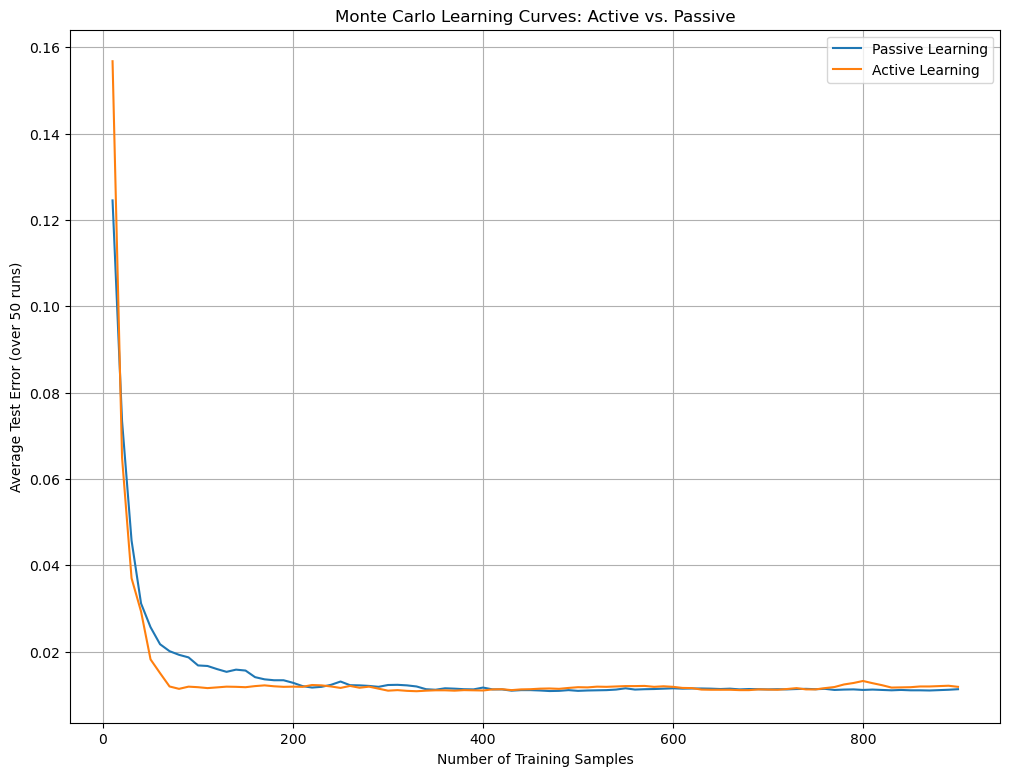

In [20]:
plt.figure(figsize=(12,9))
plt.plot(sample_sizes, passive_errors, label='Passive Learning')
plt.plot(sample_sizes, active_errors,  label='Active Learning')
plt.xlabel("Number of Training Samples")
plt.ylabel("Average Test Error (over 50 runs)")
plt.title("Monte Carlo Learning Curves: Active vs. Passive")
plt.legend()
plt.grid(True)
plt.show()